In [1]:
import sys
from matplotlib import pyplot
import os
import azureml
from azureml.core import Experiment
from azureml.core import Environment
from azureml.core import Workspace, Datastore, Dataset
ws = Workspace.from_config()
print("Azure ML SDK Version: ", azureml.core.VERSION)
print(ws.name, ws.location, ws.resource_group, sep='\t')
from azureml.core import Experiment
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException
from azureml.core.conda_dependencies import CondaDependencies

In [2]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPool2D, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.optimizers import SGD, Adam
import sqlite3
import yaml
import csv
import numpy
import math
import cv2
from PIL import Image

In [ ]:
from azureml.core import Workspace, Dataset

subscription_id = '103da3c6-1089-4d2b-8b1d-5159e8f5ffc5'
resource_group = 'RG_Machine_Learning'
workspace_name = 'MachineLearningLab'

workspace = Workspace(subscription_id, resource_group, workspace_name)

#datasetImages = Dataset.get_by_name(workspace, name='singleLane1000Images')
#datasetImages.download(target_path='./imagesSingle', overwrite=True)

#datasetYaml = Dataset.get_by_name(workspace, name='singleLand1000Yaml')
#datasetYaml.download(target_path='./yamlSingle', overwrite=True)

#datasetImages = Dataset.get_by_name(workspace, name='100roadImages')
#datasetImages.download(target_path='./test', overwrite=True)


In [4]:
#this takes about 7 minutes to run: loads in all the data from the files 
img_array = []
dictYaml = []
fileYaml = ''
listOfEverything = []
data_tuple = ()
counter = 0
for fileImg in os.listdir('imagesSingle'):
    #print(fileImg)
    imageFilePlace = 'imagesSingle/'+fileImg
    fileYaml = fileImg[:-4]+'.yaml'
    yamlFilePlace = 'yamlSingle/'+fileYaml
    #print(fileYaml)
    with open(os.fsdecode(yamlFilePlace)) as filey:
        dictYaml = yaml.safe_load(filey)
        #print(dictYaml)
    img = Image.open(imageFilePlace)
    img_array = numpy.array(img)
    data_tuple = (img_array, dictYaml)
    listOfEverything.append(data_tuple)
    print(counter)
    counter+=1

0
1
2
3
15
16
17
18
19
20
21
32
33
34
35
36
37
38
39
40
41
42
43
44
75
76
77
78
79
80
81
82
83
84
98
99
100
101
102
103
104
105
106
118
119
120
121
122
123
124
125
126
127
140
141
142
143
144
145
146
147
148
149
150
151
152
153
167
168
169
170
171
172
173
174
175
176
177
178
179
180
192
193
194
195
196
197
198
199
200
201
202
203
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380


In [6]:
import random
import pickle
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from cv2 import cvtColor, GaussianBlur
from PIL import Image
print("Tensorflow version " + tf.__version__)
print('Keras Version '+ keras.__version__)
print("Running on GPU:", tf.test.is_built_with_cuda())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

#DO THIS WHEN YOUR COMPUTE HAS GPU POWER
#gpus= tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

Tensorflow version 2.1.0
Keras Version 2.3.1
Running on GPU: True
Num GPUs Available:  0


In [ ]:
def makeListOfX0(listEverything):
    listX0 = []
    for item in listEverything:
        listX0.append(item[1]['X0'])
    return listX0

In [7]:
def makeListOfYAW0(listEverything):
    listYAW0 = []
    for item in listEverything:
        listYAW0.append(item[1]['YAW0'])
    return listYAW0

In [8]:
def makeListOfZ0(listEverything):
    listZ0 = []
    for item in listEverything:
        listZ0.append(item[1]['Z0'])
    return listZ0

In [9]:
def makeListOfCamHeight(listEverything):
    listCamHeight = []
    for item in listEverything:
        listCamHeight.append(item[1]['cam_height'])
    return listCamHeight

In [10]:
def makeListOfDy(listEverything):
    listDy = []
    for item in listEverything:
        listDy.append(item[1]['dy'])
    return listDy

In [11]:
def makeListOfFocalLength(listEverything):
    listFocalLength = []
    for item in listEverything:
        listFocalLength.append(item[1]['focal_length'])
    return listFocalLength

In [12]:
def makeListOfInvRad(listEverything):
    listInvRad = []
    for item in listEverything:
        listInvRad.append(item[1]['inv_rad'])
    return listInvRad

In [27]:
def makeListOfRoadWidth(listEverything):
    listRoadWidth = []
    for item in listEverything:
        listRoadWidth.append(item[1]['road_width'])
    return listRoadWidth

In [13]:
def makeListOfStraight(listEverything):
    listStraight = []
    for item in listEverything:
        listStraight.append(item[1]['straight'])
    return listStraight

In [14]:
def makeListOfSteeringAngle(listEverything):
    listSteering = []
    for item in listEverything:
        listSteering.append(item[1]['steering_angle'])
    return listSteering

In [15]:
def makeImageList(listEverything):
    imList = []
    for item in listEverything:
        imList.append(item[0])
    return imList

In [16]:
def trainAndTestSplit(listEverything, splitPercent):
    train, test = train_test_split(listEverything, test_size = splitPercent)
    return train, test

In [17]:
def prepPixels(listEverything):
    listNew = []
    current = 0
    for item in listEverything:
        itemNew0 = item[0].astype('float32')
        itemNew0 = item[0]/255
        item_tuple = (itemNew0, item[1])
        current+=1
        #print(current)
        listNew.append(item_tuple)
    return listNew

In [18]:
import time
def runTime(startTime):
    currentTime = time.perf_counter()
    hours = (int)((currentTime - startTime) / 3600)
    minutes = (int)(((currentTime - startTime) - (3600 * hours)) / 60)
    seconds = (int)((currentTime - startTime) - (3600 * hours) - (60 * minutes))
    
    print("\n__Time__", "\nHours:", hours, "\nMinutes:", minutes, "\nSeconds:", seconds)

In [19]:
#only run once per start
list0 = prepPixels(listOfEverything)
 

In [20]:
#only run once per kernel start
train, test = trainAndTestSplit(list0, 0.4)

trainX = numpy.array(makeImageList(train))
#trainYforYAW0 = makeListOfYAW0(train)
#trainYforRoadWidth = makeListOfRoadWidth(train)
trainYforSteering = makeListOfSteeringAngle(train)

crossVal, test = trainAndTestSplit(test, 0.5)

testX = numpy.array(makeImageList(test))

#testYforYAW0 = makeListOfYAW0(test)
#testYforRoadWidth = makeListOfRoadWidth(test)
testYforSteering = (makeListOfSteeringAngle(test))

crossValX = numpy.array(makeImageList(crossVal))
#crossValYforYAW0 = makeListOfYAW0(crossVal)
#crossValYforRoadWidth = makeListOfRoadWidth(crossVal)
crossValYforSteering = (makeListOfSteeringAngle(crossVal))

import gc
del list0
del train
del test
del crossVal
gc.collect()


22

In [21]:
def modelCreate():
    model =Sequential()

    model.add(Conv2D(3, (5,5), strides=(2,2), input_shape = (480,640,3), activation='relu'))
    
    model.add(Dropout(0.2))


    model.add(Conv2D(24, (5,5), strides=(2,2), activation='relu'))


    model.add(Conv2D(36, (5,5), strides=(2,2), activation='relu'))


    model.add(Conv2D(48, (3,3), strides=(2,2), activation='relu'))


    model.add(Conv2D(64, (3,3), strides=(2,2), activation='relu'))

    model.add(Flatten())

    model.add(Dense(1164, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    
    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
        
    print(model)

    return model

In [41]:
startTime = time.perf_counter()
modelOutputDir = os.getcwd()

model = modelCreate()
print('Model has been created')
#trainX = numpy.array(trainX)
#testX = numpy.array(testX)
#crossValX = numpy.array(crossValX)
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False)
datagen.fit(trainX)
itTrain = datagen.flow(trainX, trainYforSteering, batch_size=32)
steps = int(trainX.shape[0] / 32)
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(modelOutputDir, 'laneNavModelSteering.h5'), verbose=1, save_best_only=True)
print('checkpoint callback done')

history = model.fit(itTrain,
                              steps_per_epoch=steps,
                              epochs=10,
                              validation_data=(crossValX,crossValYforSteering),
                              verbose=1,
                              shuffle=1,)
print('history is done')

#model.fit(trainX, trainYforYAW0, epochs=10, batch_size=64, verbose=0)
model.save(os.path.join(modelOutputDir, 'laneNavModelSteering.h5'))
print('model has been saved')

runTime(startTime)

Model has been created
checkpoint callback done
Epoch 1/10
56/56 [==============================] - 109s 2s/step - loss: 506.8272 - val_loss: 31.4361
Epoch 2/10
56/56 [==============================] - 107s 2s/step - loss: 23.3115 - val_loss: 28.1487
Epoch 3/10
56/56 [==============================] - 106s 2s/step - loss: 22.0751 - val_loss: 28.2023
Epoch 4/10
56/56 [==============================] - 105s 2s/step - loss: 22.5181 - val_loss: 29.1760
Epoch 5/10
56/56 [==============================] - 104s 2s/step - loss: 24.5651 - val_loss: 28.0216
Epoch 6/10
56/56 [==============================] - 104s 2s/step - loss: 22.1749 - val_loss: 27.8968
Epoch 7/10
56/56 [==============================] - 103s 2s/step - loss: 21.9349 - v

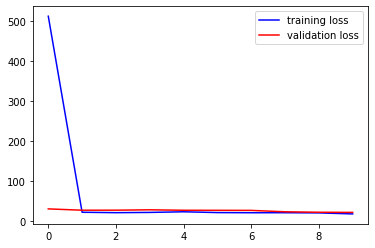

In [42]:
pyplot.plot(history.history['loss'], color='blue')
pyplot.plot(history.history['val_loss'], color='red')
pyplot.legend(['training loss', 'validation loss'])

In [22]:

model = load_model('laneNavModelSteering.h5')

#def prepComputeImage(imageTest):
    #imageTest = numpy.array(imageTest)
    #imageTest = imageTest.astype('float32')
    #imageTest = imageTest/255
    #params = model.predict(imageTest)
    #return params
#print(trainX.shape)

#testing = testX[5]
#testing = numpy.array(testing)
#testing = testing.reshape(1,480,640,3)

#print(model.predict(testing))
#print(testYforYAW0[5])
current = 0
totalPercentError = 0
numberWrong = 0
modelOutput = []
for item in testX:
    item = numpy.array(item)
    item = item.reshape(1,480,640,3)
    prediction = model.predict(item)
    modelOutput.append(prediction[0][0])
    prediction = round(prediction[0][0])
    print(prediction)
    print(testYforSteering[current])
    totalPercentError+=(abs((testYforSteering[current]-prediction)/testYforSteering[current]))*100
    current+=1
print('done')
print(totalPercentError/testX.shape[0])
#print(testX.shape)



58.0
54
60.0
63
60.0
57
56.0
51
55.0
46
57.0
51
60.0
59
60.0
63
58.0
61
56.0
54
56.0
62
56.0
50
61.0
62
58.0
58
56.0
59
59.0
56
56.0
50
58.0
60
60.0
66
58.0
52
57.0
53
58.0
58
60.0
59
55.0
57
57.0
61
57.0
51
58.0
55
56.0
59
59.0
59
57.0
56
60.0
61
59.0
56
56.0
48
57.0
59
56.0
48
58.0
55
57.0
57
61.0
64
57.0
58
56.0
52
59.0
62
58.0
55
60.0
60
60.0
65
56.0
50
58.0
66
57.0
49
58.0
57
58.0
57
57.0
60
59.0
63
60.0
58
58.0
55
62.0
55
61.0
59
61.0
60
61.0
60
57.0
51
56.0
63
56.0
56
61.0
56
60.0
60
57.0
61
56.0
47
60.0
60
56.0
60
58.0
54
59.0
60
56.0
51
56.0
53
57.0
63
61.0
62
57.0
61
56.0
50
56.0
54
56.0
56
58.0
58
56.0
51
59.0
61
57.0
58
58.0
54
58.0
59
56.0
49
62.0
62
57.0
54
57.0
54
59.0
56
56.0
50
56.0
56
58.0
56
61.0
58
57.0
59
60.0
61
59.0
61
56.0
59
58.0
56
60.0
58
56.0
55
58.0
55
58.0
52
56.0
50
60.0
57
57.0
58
60.0
67
62.0
57
57.0
58
62.0
64
56.0
50
56.0
66
61.0
64
56.0
62
61.0
64
60.0
65
56.0
56
59.0
61
59.0
61
56.0
57
59.0
61
56.0
58
60.0
60
57.0
53
61.0
63
59.0
55
56.0
58
56.0
61


In [25]:
model = load_model('laneNavModelSteering.h5')
testImagePlace = 'imagesSingle/00b06ca5-e29b-44fa-944c-6c52578d1737.png'
testImageYamlPlace = 'yamlSingle/00b06ca5-e29b-44fa-944c-6c52578d1737.yaml'

dictYaml = {}

img = numpy.array(Image.open(testImagePlace))
img = img.astype('float32')
img = img/255

images = []
images.append(img)

images = numpy.array(images)

with open(os.fsdecode(testImageYamlPlace)) as filey:
    dictYaml = yaml.safe_load(filey)
    #print(dictYaml)
print(dictYaml['steering_angle'])

for img1 in images:
    img1 = img1.reshape(1,480,640,3)
    prediction = model.predict(img1)
    print(prediction)

58
58
[[59.388702]]
[[59.388702]]


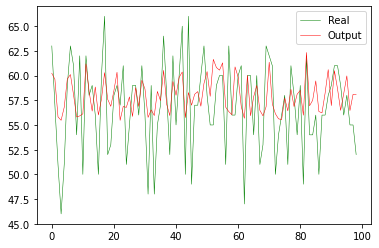

In [26]:
#for yaml in testYforSteering:
testYforSteering100 = testYforSteering[1:100]
modelOutput100 = modelOutput[1:100]
pyplot.plot(testYforSteering100, color = 'green', lw = 0.5) 

#for param in modelOutput:
pyplot.plot(modelOutput100, color = 'red', lw = 0.5 )

pyplot.legend(['Real', 'Output'])